<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/Simulacion-I/blob/main/Prueba_de_Kolmogorov_Smirnov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba de Kolmogorov-Smirnov

Proponemos:
$$H_0: x_n\sim U(0,1)$$

y

$$H_a: x_n\not\sim U(0,1)$$

Como prueba para saber si un conjunto de datos proviene de la distribución $U(0,1)$.

Dada una muestra $x_n$ de prueba, los pasos a seguir para realizarla:

Paso 1:

Ordenar los números de la muestra en orden ascendente.

Paso 2:

Calcular el estadístico de prueba $D$ a partir de:

$$D^{+}=max|\frac{i}{x}-x_i|$$, $$D^-max|x_i-\frac{i-1}{n}|$$ con $1<i<n$ e $i$ es la posición de $x_i$.

Para obtener:

$$D=max(D^+,D^-)$$

Paso 3:

Comparar el valor crítico $d_{\alpha,n}$

Si $D<d_{\alpha, n}$ no se rechaza $H_0$.

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import requests
import ast
import tabulate

In [ ]:
url = "https://raw.githubusercontent.com/LuisManuelCatzoliSoriano/Simulacion-I/refs/heads/main/data.txt"

response = requests.get(url) #Descarga el contenido del link
contenido = response.text #Transforma el contenido en un texto

lista = ast.literal_eval(contenido) #Transforma un texto en una lista

df = pd.DataFrame(lista, columns=["datos"]) #Crea un DataFrame a partir de la lista de números
df.head() #Muestra las primeras filas del DataFrame

,datos
0,0.78961
1,0.05230
2,0.10699
3,0.55877
4,0.14151


Primero ordeno los datos de la muestra en forma ascendente:

In [ ]:
ordenados = sorted(lista)

print(ordenados)

[0.00121, 0.03185, 0.03272, 0.0501, 0.0523, 0.05475, 0.07281, 0.08128, 0.09133, 0.09264, 0.10699, 0.1085, 0.11537, 0.12079, 0.14151, 0.15506, 0.17028, 0.18284, 0.19147, 0.19862, 0.19904, 0.20852, 0.21631, 0.22287, 0.22724, 0.23949, 0.24, 0.26693, 0.27738, 0.28269, 0.29453, 0.29931, 0.30861, 0.33216, 0.33381, 0.33954, 0.34358, 0.34488, 0.35286, 0.36982, 0.38507, 0.38618, 0.38729, 0.40644, 0.41678, 0.42989, 0.44267, 0.45679, 0.48308, 0.49883, 0.49962, 0.51781, 0.53559, 0.54325, 0.5517, 0.55743, 0.55877, 0.5741, 0.5788, 0.58244, 0.58518, 0.58962, 0.61168, 0.624, 0.63458, 0.64183, 0.65002, 0.65559, 0.65726, 0.67621, 0.68334, 0.69623, 0.70119, 0.72102, 0.73059, 0.73485, 0.74579, 0.75103, 0.76086, 0.76262, 0.7691, 0.78961, 0.79113, 0.79269, 0.79982, 0.80548, 0.81772, 0.82654, 0.83558, 0.85853, 0.85903, 0.87616, 0.88752, 0.88809, 0.89898, 0.90829, 0.91512, 0.93655, 0.94187, 0.98611]


El código que genere la información que queremos de la tabla:

In [ ]:
table_data = []
n = len(ordenados)

for i, x_i in enumerate(ordenados):
    i_val = i + 1

    i_minus_1_div_n = i / n

    D_minus_i = abs(x_i - i_minus_1_div_n)

    D_plus_i = abs((i_val / n) - x_i)

    table_data.append([i_val, x_i, (i)/n, (i+1)/n, D_minus_i, D_plus_i])

encabezados = ["i", "x_i", "(i-1)/n", "i/n", "D^-", "D^+"]
print(tabulate.tabulate(table_data, headers=encabezados, tablefmt="psql", numalign="center"))

+-----+---------+-----------+-------+---------+---------+
|  i  |   x_i   |  (i-1)/n  |  i/n  |   D^-   |   D^+   |
|-----+---------+-----------+-------+---------+---------|
|  1  | 0.00121 |     0     | 0.01  | 0.00121 | 0.00879 |
|  2  | 0.03185 |   0.01    | 0.02  | 0.02185 | 0.01185 |
|  3  | 0.03272 |   0.02    | 0.03  | 0.01272 | 0.00272 |
|  4  | 0.0501  |   0.03    | 0.04  | 0.0201  | 0.0101  |
|  5  | 0.0523  |   0.04    | 0.05  | 0.0123  | 0.0023  |
|  6  | 0.05475 |   0.05    | 0.06  | 0.00475 | 0.00525 |
|  7  | 0.07281 |   0.06    | 0.07  | 0.01281 | 0.00281 |
|  8  | 0.08128 |   0.07    | 0.08  | 0.01128 | 0.00128 |
|  9  | 0.09133 |   0.08    | 0.09  | 0.01133 | 0.00133 |
| 10  | 0.09264 |   0.09    |  0.1  | 0.00264 | 0.00736 |
| 11  | 0.10699 |    0.1    | 0.11  | 0.00699 | 0.00301 |
| 12  | 0.1085  |   0.11    | 0.12  | 0.0015  | 0.0115  |
| 13  | 0.11537 |   0.12    | 0.13  | 0.00463 | 0.01463 |
| 14  | 0.12079 |   0.13    | 0.14  | 0.00921 | 0.01921 |
| 15  | 0.1415

Defino la función que haga la prueba de Kolmogorov-Smirnov:

In [ ]:
def pdks(data, alpha):
    n = len(data)

    d_plus_values = []
    d_minus_values = []

    for i in range(n):
        D_plus_i = abs((i + 1) / n - data[i])

        D_minus_i = abs(data[i] - i / n)

        d_plus_values.append(D_plus_i)
        d_minus_values.append(D_minus_i)

    D_plus = max(d_plus_values)
    D_minus = max(d_minus_values)

    D = max(D_plus, D_minus)

    print("El valor de D:", D)

    d_alpha_multiplier = stats.kstwobign.ppf(1 - alpha)

    print("El valor crítico de d_alpha:", d_alpha_multiplier)

    d_alpha = d_alpha_multiplier / np.sqrt(n)

    if D < d_alpha:
        return print("No se rechaza la hipótesis, la muestra proviene de una función uniforme")
    else:
        return print("Se rechaza la hipótesis, la muestra no provienen de una función uniforme")

Llamo a la función y estaré usando $\alpha=0.05$:

In [ ]:
pdks(ordenados, 0.05)

El valor de D: 0.05487999999999993
El valor crítico de d_alpha: 1.3580986393225505
No se rechaza la hipótesis, la muestra proviene de una función uniforme


Por último, interesa ver una gráfica que compare la frecuencia observada y la esperada:

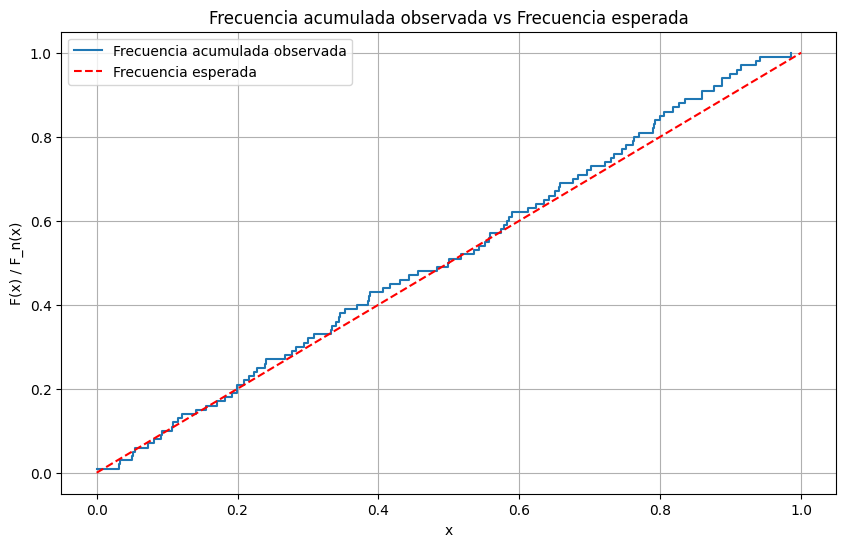

In [ ]:
plt.figure(figsize=(10, 6))

plt.step(ordenados, np.arange(1, n + 1) / n, label='Frecuencia acumulada observada', where='post')

plt.plot([0, 1], [0, 1], 'r--', label='Frecuencia esperada')

plt.title('Frecuencia acumulada observada vs Frecuencia esperada')
plt.xlabel('x')
plt.ylabel('F(x) / F_n(x)')
plt.legend()
plt.grid(True)
plt.show()